3.1448


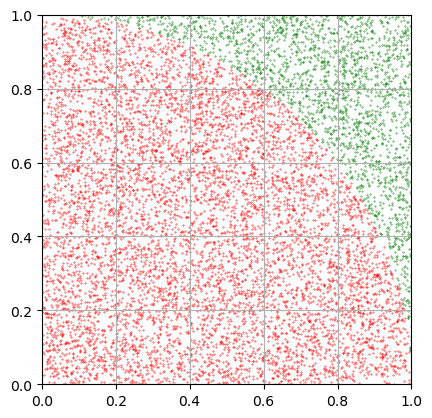

In [27]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()
from scipy import integrate
from scipy import interpolate

# Draw Nsamp points (xi, yi) from the box [0,1]x[0,1]
Nsamp = 10000
x = rng.random(size=Nsamp)
y = rng.random(size=Nsamp)

# Check which point falls within the quarter circle r=1 i.e.,
# sqrt(x^2 + y^2) <= 1. Numpy automatically does this 
# element-wise and will return a boolean array

r = np.sqrt(x**2 + y**2)
is_inside = (r <= 1)

# Taking the sum of the boolean array returns how many True
# is inside. Thus, the fraction of True's from the drawn points is:
inside_ratio = np.sum(is_inside)/Nsamp

# What is 4 times this ratio?
print(inside_ratio*4)

## Visualization
fig, ax = plt.subplots()
ax.scatter(x[is_inside], y[is_inside], s=0.1, c="red")
ax.scatter(x[~is_inside], y[~is_inside], s=0.1, c="green")
ax.set(xlim=[0,1], ylim=[0,1], aspect="equal")
ax.grid(True)

In [28]:
#real values
from scipy.special import gamma
def V_real(r, d):
    V_real = ((np.pi*(r**2))**(d/2))/(gamma((d/2)+1))
    return (V_real)
N = np.arange(1,11)
print(V_real(1,N))

#monte carlo: change dim to get all V up to 10-D
dim = (10)
N = 1000000
coords = rng.random((dim, N))

r = 0
for i in coords:
    r = r + i**2
(2**dim)*np.sum(np.sqrt(r) < 1)/N

[2.         3.14159265 4.1887902  4.9348022  5.26378901 5.16771278
 4.72476597 4.05871213 3.2985089  2.55016404]


np.float64(2.484224)

In [29]:
# Draw from N(0, 1/sqrt(2)) ~ (1/sqrt(pi))*exp(-x^(-2))
x = rng.normal(0, 1/np.sqrt(2), size=100000)
# Take the average. f has to cancel the (1/sqrt(pi)) from p(x)
expect = np.mean(np.sqrt(np.pi)/(np.sqrt(1 + x**2)))
print(expect)


my_int = lambda x:( (x**2 + x)/(np.sqrt(x)))*(np.exp(-x))
quad_out, err = integrate.quad(my_int, 0, np.inf)
print(quad_out)

1.5234770435970288
2.215567313631897


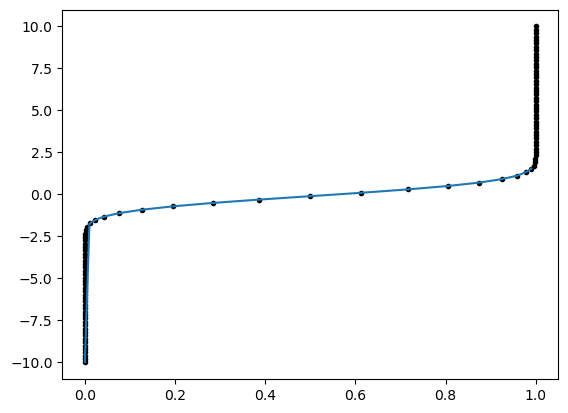

In [37]:
x = np.linspace(-10, 10, 100)
p_x = np.exp(-x**2)

cdf_px = np.cumsum(p_x)/np.sum(p_x)
inv_cdf = interpolate.interp1d(cdf_px, x)

x_line = np.linspace(min(p_x), max(p_x), 100)
y_line = inv_cdf(x_line)

plt.plot(cdf_px, x, "k.")
plt.plot(x_line, y_line)

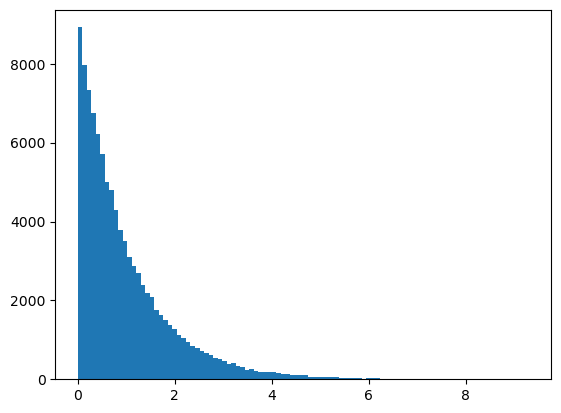

In [38]:
x = np.linspace(1e-6, 10, 100)

p_x = np.exp(-x)

cdf_px = np.cumsum(p_x)/np.sum(p_x)
inv_cdf = interpolate.interp1d(cdf_px, x)

draw_nums = rng.uniform(min(cdf_px), max(cdf_px), 100000)

plt.hist(inv_cdf(draw_nums), bins=100)
plt.show()

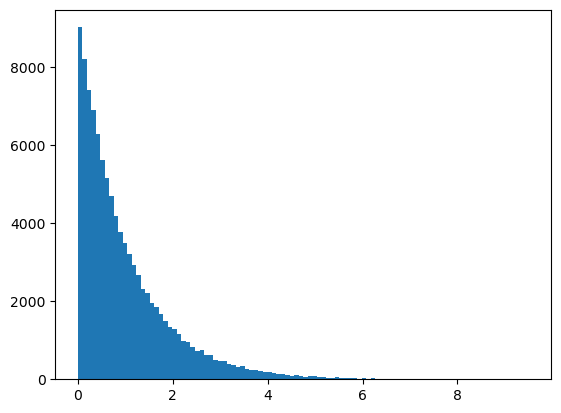

In [40]:
x = np.linspace(1e-6, 10, 100)

p_x = np.exp(-x)

cdf_px = np.cumsum(p_x)/np.sum(p_x)
inv_cdf = interpolate.interp1d(cdf_px, x)

draw_nums = rng.uniform(min(cdf_px), max(cdf_px), 100000)

plt.hist(inv_cdf(draw_nums), bins=100)
plt.show()

Quad out:  2.215567313631897
mean:  2.2121145684709123


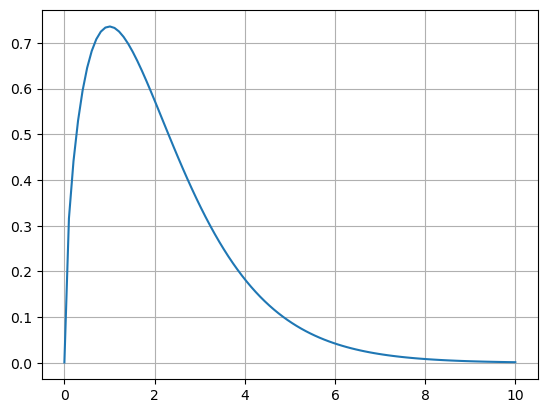

In [65]:
#7.2521


x = np.linspace(1e-6, 10, 100)
my_int_7251 = lambda x:( (x**2 + x)/(np.sqrt(x)))*(np.exp(-x))
quad_out_72521, err_72521 = integrate.quad(my_int, 0, np.inf)
print("Quad out: ", quad_out_72521)

p_x = np.exp(-x)
cdf_px = np.cumsum(p_x)/np.sum(p_x)
inv_cdf = interpolate.interp1d(cdf_px, x)
draw_nums = rng.uniform(min(cdf_px), max(cdf_px), 100000)
exp_draws = inv_cdf(draw_nums)
o = exp_draws
vals = (o + o**2)/np.sqrt(o)
print("mean: ",np.mean(vals))


x = np.linspace(1e-6, 10, 100)
curve = ((x**2 + x)/(np.sqrt(x)))*(np.exp(-x))

fig, ax = plt.subplots()
ax.plot(x, curve)
ax.grid(True)

Quad out:  7.954926521012845
mean:  7.967375540685358


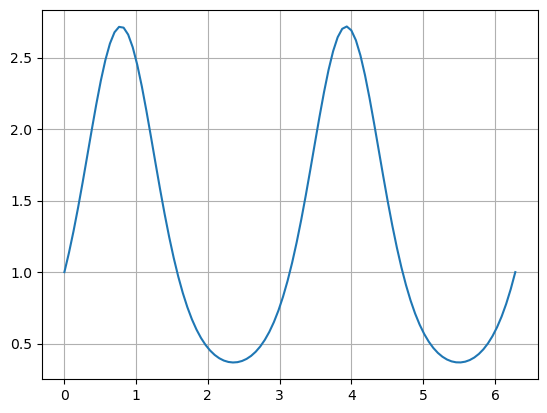

In [77]:
#7.2522a
#scipy quad
x = rng.normal(0, 1/np.sqrt(2), size=100000)
my_int_7252a = lambda x:(np.exp(np.sin(2*x)))
quad_out_7252a, err_7252a = integrate.quad(my_int_7252a, 0, (2*np.pi))
print("Quad out: ", quad_out_7252a)


#monte carlo
x = rng.normal(0, 2*np.pi, size=100000)
expect = np.mean(np.exp(np.sin(2*x))*(2*np.pi))
print("mean: ", expect)

#plot
x = np.linspace(1e-6, (2*np.pi), 100)
curve = (np.exp(np.sin(2*x)))

fig, ax = plt.subplots()
ax.plot(x, curve)
ax.grid(True)

Quad out:  3.6275987284684352
mean:  0.5764453798982824


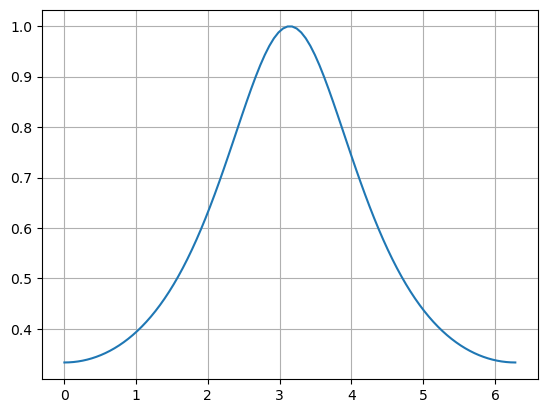

In [78]:
#7.2522b
x = rng.normal(0, 1/np.sqrt(2), size=100000)
my_int_7252b = lambda x:(1/(2 + np.cos(x)))
quad_out_7252b, err_7252b = integrate.quad(my_int_7252b, 0, (2*np.pi))
print("Quad out: ", quad_out_7252b)

x = rng.normal(0, 2*np.pi, size=100000)
expect = np.mean(1/(2 + np.cos(x)))
print("mean: ", expect)


x = np.linspace(1e-6, (2*np.pi), 100)
curve = (1/(2 + np.cos(x)))

fig, ax = plt.subplots()
ax.plot(x, curve)
ax.grid(True)

Quad out:  2.0843812219749895


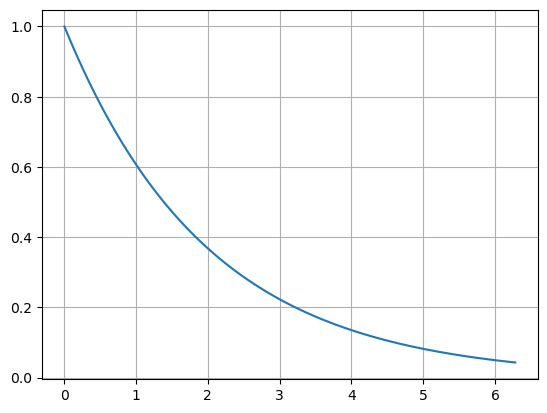

In [68]:
#7.2522c
x = rng.normal(0, 1/np.sqrt(2), size=100000)
my_int_7252c = lambda x:(np.exp(-x/2))
quad_out_7252c, err_7252c = integrate.quad(my_int_7252c, -1, 1)
print("Quad out: ", quad_out_7252c)

# x = np.linspace(1e-6, (2*np.pi), 100)
# p_x = (np.exp(np.sin(2*x)))
# cdf_px = np.cumsum(p_x)/np.sum(p_x)
# inv_cdf = interpolate.interp1d(cdf_px, x)
# draw_nums = rng.uniform(min(cdf_px), max(cdf_px), 100000)
# exp_draws = inv_cdf(draw_nums)
# o = exp_draws
# vals = (o + o**2)/np.sqrt(o)
# print("mean: ",np.mean(vals))


x = np.linspace(1e-6, (2*np.pi), 100)
curve = (np.exp(-x/2))

fig, ax = plt.subplots()
ax.plot(x, curve)
ax.grid(True)

Quad out:  -0.8948314694841447


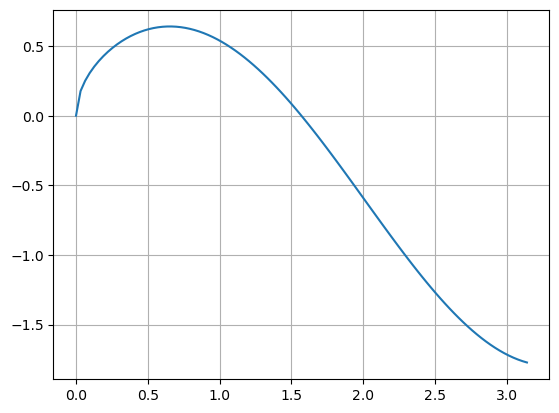

In [70]:
#7.2523
x = rng.normal(0, 1/np.sqrt(2), size=100000)
my_int_7253 = lambda x:(np.sqrt(x)*np.cos(x))
quad_out_7253, err_7253 = integrate.quad(my_int_7253, 0, np.pi)
print("Quad out: ", quad_out_7253)

# x = np.linspace(1e-6, (2*np.pi), 100)
# p_x = (np.exp(np.sin(2*x)))
# cdf_px = np.cumsum(p_x)/np.sum(p_x)
# inv_cdf = interpolate.interp1d(cdf_px, x)
# draw_nums = rng.uniform(min(cdf_px), max(cdf_px), 100000)
# exp_draws = inv_cdf(draw_nums)
# o = exp_draws
# vals = (o + o**2)/np.sqrt(o)
# print("mean: ",np.mean(vals))


x = np.linspace(1e-6, (np.pi), 100)
curve = (np.sqrt(x)*np.cos(x))

fig, ax = plt.subplots()
ax.plot(x, curve)
ax.grid(True)